# Import Libraries:


In [67]:
import seaborn as sns
from plotly import __version__
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import confusion_matrix



init_notebook_mode(connected=True)
print(__version__)


import seaborn as sns
import json




from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix





5.9.0


# First dataset

# Load the dataset

## dataset-Data Preprocessing/Transformation

In [3]:

# Load the dataset
data = pd.read_csv(r"C:\Users\shrog ahmad\Desktop\mastr's M\DV\project\COVID-19.csv")

# Basic Data Exploration
print(data.head())


        Entity Code       Day  containment_index  income_support  \
0  Afghanistan  AFG  1/1/2020                0.0             0.0   
1  Afghanistan  AFG  1/2/2020                0.0             0.0   
2  Afghanistan  AFG  1/3/2020                0.0             0.0   
3  Afghanistan  AFG  1/4/2020                0.0             0.0   
4  Afghanistan  AFG  1/5/2020                0.0             0.0   

   facial_coverings  school_closures  workplace_closures  testing_policy  \
0               0.0              0.0                 0.0             0.0   
1               0.0              0.0                 0.0             0.0   
2               0.0              0.0                 0.0             0.0   
3               0.0              0.0                 0.0             0.0   
4               0.0              0.0                 0.0             0.0   

   vaccination_policy  total_cases  total_deaths  population_density  \
0                 0.0          0.0  87354.442417              

In [3]:
# print(data.describe())
print(data.describe())


       containment_index  income_support  facial_coverings  school_closures  \
count      198461.000000   198460.000000     198460.000000    198460.000000   
mean           46.605324        0.676071          2.223053         1.215721   
std            19.920170        0.760698          1.298370         1.138742   
min             0.000000        0.000000          0.000000         0.000000   
25%            33.190000        0.000000          1.000000         0.000000   
50%            48.570000        0.000000          3.000000         1.000000   
75%            61.910000        1.000000          3.000000         2.000000   
max            93.450000        2.000000          4.000000         3.000000   

       workplace_closures  testing_policy  vaccination_policy   total_cases  \
count       198460.000000   198460.000000       198460.000000  3.242640e+05   
mean             1.148393        2.090381            2.792502  6.926249e+06   
std              0.990367        0.954948          

In [4]:
statistical_description = data.describe(include='all')
statistical_description

,Entity,Code,Day,containment_index,income_support,facial_coverings,school_closures,workplace_closures,testing_policy,vaccination_policy,total_cases,total_deaths,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita
count,198461,198461,198461,198461.000000,198460.000000,198460.000000,198460.000000,198460.000000,198460.000000,198460.000000,3.242640e+05,3.024180e+05,307566.000000,285971.000000,276018.000000,283103.000000,280320.000000
unique,185,185,1096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,AFG,1/1/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1097,1097,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,46.605324,0.676071,2.223053,1.215721,1.148393,2.090381,2.792502,6.926249e+06,8.735444e+04,400.512750,30.499290,8.697071,5.497377,18962.269185
std,NaN,NaN,NaN,19.920170,0.760698,1.298370,1.138742,0.990367,0.954948,2.330760,4.186348e+07,4.456835e+05,1826.272236,9.080762,6.093907,4.135910,19911.502688
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.137000,15.100000,1.144000,0.526000,661.240000
25%,NaN,NaN,NaN,33.190000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,8.455000e+03,1.300000e+02,37.728000,22.200000,3.526000,2.085000,3823.194000
50%,NaN,NaN,NaN,48.570000,0.000000,3.000000,1.000000,1.000000,2.000000,4.000000,7.322350e+04,1.361000e+03,90.672000,29.700000,6.378000,3.871000,12294.876000
75%,NaN,NaN,NaN,61.910000,1.000000,3.000000,2.000000,2.000000,3.000000,5.000000,7.942042e+05,1.203100e+04,222.873000,38.700000,13.928000,8.643000,27216.445000


In [5]:
# Data prerocessing
data.isnull().sum()

Entity                163700
Code                  163700
Day                   163700
containment_index     163700
income_support        163701
facial_coverings      163701
school_closures       163701
workplace_closures    163701
testing_policy        163701
vaccination_policy    163701
total_cases            37897
total_deaths           59743
population_density     54595
median_age             76190
aged_65_older          86143
aged_70_older          79058
gdp_per_capita         81841
dtype: int64

In [6]:
# Handling missing values for 'total_cases' and 'total_deaths' using mean imputation

# Calculate the mean for 'total_cases' and 'total_deaths'
mean_total_cases = data['total_cases'].mean()
mean_total_deaths = data['total_deaths'].mean()

# Replace missing values with the mean
data['total_cases'].fillna(mean_total_cases, inplace=True)
data['total_deaths'].fillna(mean_total_deaths, inplace=True)



In [8]:
# Checking if the missing values are filled
missing_values_after_imputation = data[['total_cases', 'total_deaths']].isnull().sum()

missing_values_after_imputation

total_cases     0
total_deaths    0
dtype: int64

In [9]:
# Handling missing values for policy-related columns using mean imputation

policy_columns = ['containment_index', 'income_support', 'facial_coverings', 
                  'school_closures', 'workplace_closures', 'testing_policy', 'vaccination_policy']

# Calculate the mean for each policy-related column and replace missing values with the mean
for column in policy_columns:
    mean_value = data[column].mean()
    data[column].fillna(mean_value, inplace=True)



In [10]:
# Checking if the missing values are filled in these columns
missing_values_policy_columns = data[policy_columns].isnull().sum()

missing_values_policy_columns

containment_index     0
income_support        0
facial_coverings      0
school_closures       0
workplace_closures    0
testing_policy        0
vaccination_policy    0
dtype: int64

In [11]:
# Handling missing values for demographic and economic indicators using median imputation

demographic_economic_columns = ['population_density', 'median_age', 'aged_65_older', 
                                'aged_70_older', 'gdp_per_capita']

# Calculate the median for each demographic and economic indicator column and replace missing values with the median
for column in demographic_economic_columns:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)


In [12]:

# Checking if the missing values are filled in these columns
missing_values_demographic_economic = data[demographic_economic_columns].isnull().sum()

missing_values_demographic_economic

population_density    0
median_age            0
aged_65_older         0
aged_70_older         0
gdp_per_capita        0
dtype: int64

In [21]:
# Removing rows where 'Entity', 'Code', or 'Day' is missing
data_cleaned = data.dropna(subset=['Entity', 'Code', 'Day'])


In [23]:
# Checking the number of missing values in these columns after removal
missing_values_after_removal = data_cleaned[['Entity', 'Code', 'Day']].isnull().sum()

# Checking the new shape of the dataset
new_shape = data_cleaned.shape
missing_values_after_removal 

Entity    0
Code      0
Day       0
dtype: int64

In [32]:
# Using IQR method to identify outliers in 'total_cases'
Q1 = data_cleaned['total_cases'].quantile(0.25)
Q3 = data_cleaned['total_cases'].quantile(0.75)
IQR = Q3 - Q1

# Defining the thresholds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying the outliers
outliers_total_cases = data_cleaned[(data_cleaned['total_cases'] < lower_bound) | 
                                          (data_cleaned['total_cases'] > upper_bound)]

# Percentage of data that are outliers
outliers_percentage = len(outliers_total_cases) / len(data_cleaned) * 100

# Summary of outliers detection
outliers_summary = {
    "Lower Bound": lower_bound,
    "Upper Bound": upper_bound,
    "Number of Outliers": len(outliers_total_cases),
    "Percentage of Outliers": outliers_percentage
}

outliers_summary, outliers_total_cases.head()

'''The results indicate that about 19.28% of the data in the total_cases column are considered outliers
based on the IQR method. It's important to note that in the context of COVID-19 data, what might be statistically 
classified as outliers could be actual extreme but valid values, especially in the case of countries with very high or
very low case counts.'''



({'Lower Bound': -1844031.5,
  'Upper Bound': 3105308.5,
  'Number of Outliers': 38257,
  'Percentage of Outliers': 19.276835247227414},
            Entity Code         Day  containment_index  income_support  \
 399   Afghanistan  AFG    2/3/2021              16.48        0.676071   
 1811      Albania  ALB  12/15/2021              56.55        1.000000   
 1812      Albania  ALB  12/16/2021              56.55        1.000000   
 1813      Albania  ALB  12/17/2021              56.55        1.000000   
 1814      Albania  ALB  12/18/2021              56.55        1.000000   
 
       facial_coverings  school_closures  workplace_closures  testing_policy  \
 399           2.223053         1.215721            1.148393        2.090381   
 1811          3.000000         1.000000            2.000000        2.000000   
 1812          3.000000         1.000000            2.000000        2.000000   
 1813          3.000000         1.000000            2.000000        2.000000   
 1814          3.

In [33]:
# Data Transformation
data['Day'] = pd.to_datetime(data['Day'])


## Plotting:

In [21]:
df = pd.read_csv(r"C:\Users\shrog ahmad\Desktop\dv_1\COVID-19_Preprocessed.csv")

data = []
# Iterate over unique values in the 'Entity' column
for i in sorted(df['Entity'].value_counts().index.tolist()):
    # Filter the DataFrame to obtain data for the current entity
    dftmp = df[df['Entity'] == i]
    
    # Calculate the maximum value of 'total_deaths' within the subset
    mx_death = np.max(dftmp['total_deaths'].values)
    
    # Retrieve the corresponding 'Day' value for the maximum 'total_deaths'
    date = dftmp[dftmp['total_deaths'] == mx_death]['Day'].values[0]
    
    # Retrieve the 'containment_index' and 'median_age' values associated with the maximum 'total_deaths'
    cnt_index = dftmp[dftmp['total_deaths'] == mx_death]['containment_index'].values[0]
    med_age = dftmp[dftmp['total_deaths'] == mx_death]['median_age'].values[0]
    
    # Append the entity name, maximum deaths, containment index, median age, and associated date to the 'data' list
    data.append((i, mx_death, cnt_index, med_age, date))

# Create a new DataFrame 'df2' using the collected data
df2 = pd.DataFrame(data, columns=['Entity', 'total_deaths', 'containment_index', 'median_age', 'Day'])

# Chart of average deaths for each country

In [22]:
# Create a trace for the scatter plot
trace = go.Scatter(
    x=df2['Entity'],  # X-axis data
    y=df2['total_deaths'],  # Y-axis data
    line=dict(color='red'),  # Set the line color to red
    name="Total Deaths"  # Set the name for the trace
)

# Define the layout for the plot
layout = go.Layout(
    title='COVID-19 Total Deaths in the World',  # Set the title of the plot
    plot_bgcolor='rgb(210, 230, 255)',  # Set the background color of the plot
    showlegend=True  # Show the legend in the plot
)

# Create a Figure object with the trace and layout
fig = go.Figure(data=[trace], layout=layout)

# Display the figure using the interactive plot (iplot) function
iplot(fig)

## Chart of the disease containment rate for each country

In [23]:
# Create a trace for the scatter plot
trace1 = go.Scatter(
    x=df2['Entity'],  # X-axis data
    y=df2['containment_index'],  # Y-axis data
    name="Containment Index"  # Set the name for the trace
)

# Define the layout for the plot
layout = go.Layout(
    title='COVID-19 Containment Index',  # Set the title of the plot
    plot_bgcolor='rgb(210, 230, 255)',  # Set the background color of the plot
    showlegend=True  # Show the legend in the plot
)

# Create a Figure object with the trace and layout
fig = go.Figure(data=[trace1], layout=layout)

# Display the figure using the interactive plot (iplot) function
iplot(fig)

## Show the death rate in the Gulf countries

In [24]:
# Gulf Countries:
countries = ['Bahrain', 'Kuwait', 'Oman', 'Qatar', 'Saudi Arabia', 'United Arab Emirates', 'Yemen']

# Select data for the Gulf countries from the DataFrame
df_selected_countries = df[df['Entity'].isin(countries)]

# Calculate the maximum total deaths for each country
total_deaths_by_country = df_selected_countries.groupby('Entity')['total_deaths'].max()

# Create a pie chart figure
fig = go.Figure(
    data=[
        go.Pie(
            labels=total_deaths_by_country.index,  # Set labels as country names
            hoverinfo='label+value',  # Set hover information to show label and value
            textinfo='percent',  # Set text information to show percentage
            values=total_deaths_by_country  # Set values as total deaths
        )
    ]
)

# Customize the layout of the pie chart
fig.update_layout(
    title='COVID-19 Deaths in Gulf',  # Set the title of the chart
    plot_bgcolor='rgb(210, 230, 255)',  # Set the background color of the chart
    showlegend=True  # Show the legend in the chart
)

# Display the pie chart
fig.show()

## Display the population density with the number of cases and the number of deaths for each country in the Arabian Gulf

In [25]:
df_grouped = df.groupby('Entity').mean().reset_index()
dfg = df_grouped[df_grouped['Entity'].isin(countries)]

mx = np.max(dfg['total_deaths'])
sz = 50
dfg['size'] = dfg['total_deaths'] / mx * sz + 8

C:\Users\shrog ahmad\AppData\Local\Temp\ipykernel_32960\66096077.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\shrog ahmad\AppData\Local\Temp\ipykernel_32960\66096077.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:

trace = go.Scatter(
    x=dfg['population_density'],
    y=dfg['total_cases'],
    mode='markers',
    marker=dict(
        size=dfg['size'],
        color=dfg['total_deaths'],
        colorscale='Rainbow',
        opacity=0.8,
        colorbar=dict(title='Total Deaths')
    ),
    text=dfg['Entity']
)

layout = go.Layout(
    title='Population Density vs Total Cases',
    xaxis=dict(title='Population Density'),
    yaxis=dict(title='Total Cases'),
    showlegend=False
)
fig = go.Figure(data=[trace], layout=layout)
fig.show()

## Display cases of infection and deaths by month

In [29]:
# Convert 'Day' column to datetime format
df['Day'] = pd.to_datetime(df['Day'], format='%m/%d/%Y')

# Extract month from 'Day' column
df['Month'] = df['Day'].dt.to_period('M')

# Group by month and calculate the mean values
df_monthly = df.groupby('Month').mean().reset_index()

# Convert 'Month' column to string
df_monthly['Month'] = df_monthly["Month"].astype(str)

# Create a scatter trace for total cases
trace_cases = go.Scatter(
    x=df_monthly['Month'],
    y=df_monthly['total_cases'],
    mode='lines',
    name='Total Cases',
    line=dict(color='blue')
)

# Create a scatter trace for total deaths
trace_deaths = go.Scatter(
    x=df_monthly['Month'],
    y=df_monthly['total_deaths'],
    mode='lines',
    name='Total Deaths',
    line=dict(color='red')
)

# Set up the layout for the plot
layout = go.Layout(
    title='COVID-19 Cases and Deaths Over Months',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Count'),
    showlegend=True
)

# Create the figure with the traces and layout
fig = go.Figure(data=[trace_cases, trace_deaths], layout=layout)

# Show the figure
fig.show()

C:\Users\shrog ahmad\AppData\Local\Temp\ipykernel_32960\3653119494.py:8: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



## School closures over time between 2020 and 2023

In [30]:
# Create a scatter trace for school closures
trace_school_closures = go.Scatter(
    x=df_monthly['Month'],
    y=df_monthly['school_closures'],
    mode='lines',
    name='School Closures',
    line=dict(color='purple')
)

# Set up the layout for the school closures plot
layout_school_closures = go.Layout(
    title='School Closures Over Time',
    xaxis=dict(title='Date'),
    yaxis=dict(title='School Closures'),
    showlegend=True
)

# Create the figure for school closures with the trace and layout
fig_school_closures = go.Figure(data=[trace_school_closures], layout=layout_school_closures)

# Show the figure for school closures
fig_school_closures.show()

## School closures for each country

In [33]:
df['Day'] = pd.to_datetime(df['Day'], format='%m/%d/%Y')
df['Month'] = df['Day'].dt.to_period('M').astype(str)

df_monthly = df.groupby(['Entity', 'Month']).mean().reset_index()

C:\Users\shrog ahmad\AppData\Local\Temp\ipykernel_32960\312881371.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [34]:
# Create a bar trace for school closures by country
trace_school_closures = go.Bar(
    x=df_monthly['Entity'],
    y=df_monthly['school_closures'],
    name='School Closures',
    marker=dict(color='skyblue')  # Set the color of the bars
)

# Set up the layout for the school closures by country plot
layout_school_closures = go.Layout(
    title='School Closures by Country',
    xaxis=dict(title='Country', tickangle=45),  # Rotate country labels for better readability
    yaxis=dict(title='School Closures'),
    showlegend=True,
    plot_bgcolor='rgba(0,0,0,0)'  # Set the plot background color
)

# Create the figure for school closures by country with the trace and layout
fig_school_closures = go.Figure(data=[trace_school_closures], layout=layout_school_closures)

# Show the figure for school closures by country
fig_school_closures.show()


# the second dataset

# Load the dataset

## Choice of dataset-Data Preprocessing/Transformation

In [38]:

# Define the file path (using a raw string to avoid escape character issues)
file_path = r"C:\Users\shrog ahmad\Desktop\dv_1\vaccinations.json"

# Open the file and load the data
with open(file_path, 'r') as file:
    data = json.load(file)

In [39]:
df = pd.DataFrame(data)


In [40]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   235 non-null    object
 1   iso_code  235 non-null    object
 2   data      235 non-null    object
dtypes: object(3)
memory usage: 5.6+ KB
None


In [41]:
# Display the first few rows to understand its structure
print(df.head(10))


               country  iso_code  \
0          Afghanistan       AFG   
1               Africa  OWID_AFR   
2              Albania       ALB   
3              Algeria       DZA   
4              Andorra       AND   
5               Angola       AGO   
6             Anguilla       AIA   
7  Antigua and Barbuda       ATG   
8            Argentina       ARG   
9              Armenia       ARM   

                                                data  
0  [{'date': '2021-02-22', 'total_vaccinations': ...  
1  [{'date': '2021-01-09', 'total_vaccinations': ...  
2  [{'date': '2021-01-10', 'total_vaccinations': ...  
3  [{'date': '2021-01-29', 'total_vaccinations': ...  
4  [{'date': '2021-01-25', 'total_vaccinations': ...  
5  [{'date': '2021-03-01', 'total_vaccinations': ...  
6  [{'date': '2021-02-04', 'total_vaccinations': ...  
7  [{'date': '2021-02-16', 'total_vaccinations': ...  
8  [{'date': '2020-12-29', 'total_vaccinations': ...  
9  [{'date': '2021-03-31', 'total_vaccinations': ... 

In [42]:
print(df.tail(20))


                      country  iso_code  \
215              Turkmenistan       TKM   
216  Turks and Caicos Islands       TCA   
217                    Tuvalu       TUV   
218                    Uganda       UGA   
219                   Ukraine       UKR   
220      United Arab Emirates       ARE   
221            United Kingdom       GBR   
222             United States       USA   
223       Upper middle income  OWID_UMC   
224                   Uruguay       URY   
225                Uzbekistan       UZB   
226                   Vanuatu       VUT   
227                 Venezuela       VEN   
228                   Vietnam       VNM   
229                     Wales  OWID_WLS   
230         Wallis and Futuna       WLF   
231                     World  OWID_WRL   
232                     Yemen       YEM   
233                    Zambia       ZMB   
234                  Zimbabwe       ZWE   

                                                  data  
215  [{'date': '2021-02-28', 'total_vac

In [43]:
# Descriptive Statistics
print(df.describe())

            country iso_code  \
count           235      235   
unique          235      235   
top     Afghanistan      AFG   
freq              1        1   

                                                     data  
count                                                 235  
unique                                                235  
top     [{'date': '2021-02-22', 'total_vaccinations': ...  
freq                                                    1  


In [44]:
# Check for missing values
print(df.isnull().sum())


country     0
iso_code    0
data        0
dtype: int64


In [45]:
print(df.columns)


Index(['country', 'iso_code', 'data'], dtype='object')


In [46]:
# Explode the 'data' column
df = df.explode('data')

# Convert the dictionaries in 'data' column into separate columns
df = pd.concat([df.drop(['data'], axis=1), df['data'].apply(pd.Series)], axis=1)



In [47]:
df['date'] = pd.to_datetime(df['date'])


In [48]:
print(df.head())


       country iso_code       date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG 2021-02-22                 0.0                0.0   
0  Afghanistan      AFG 2021-02-23                 NaN                NaN   
0  Afghanistan      AFG 2021-02-24                 NaN                NaN   
0  Afghanistan      AFG 2021-02-25                 NaN                NaN   
0  Afghanistan      AFG 2021-02-26                 NaN                NaN   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
0                             NaN                            NaN   
0                             NaN                            NaN   
0                             NaN                            NaN   
0                             NaN                            NaN   

   daily_vaccinations  daily_vaccinations_per_million  \
0                 NaN                             NaN   
0             

In [49]:
# Assuming 'date' is already in datetime format
df['date'] = pd.to_datetime(df['date'])


# PLOITING


## View daily vaccinations


In [50]:

# Grouping data by date and summing daily vaccinations
df_grouped_daily = df.groupby('date')['daily_vaccinations'].sum().reset_index()

trace_daily_vaccinations = go.Scatter(
    x=df_grouped_daily['date'],
    y=df_grouped_daily['daily_vaccinations'],
    mode='lines',
    line=dict(color='green'),
    name='Daily Vaccinations'
)

layout_daily_vaccinations = go.Layout(
    title='Daily Vaccinations Over Time',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Daily Vaccinations'),
    showlegend=True
)

fig_daily_vaccinations = go.Figure(data=[trace_daily_vaccinations], layout=layout_daily_vaccinations)
iplot(fig_daily_vaccinations)


# Daily Vaccinations per Million

In [51]:

# Grouping data by date and summing daily vaccinations per million
df_grouped_daily_per_million = df.groupby('date')['daily_vaccinations_per_million'].sum().reset_index()

trace_daily_vaccinations_per_million = go.Scatter(
    x=df_grouped_daily_per_million['date'],
    y=df_grouped_daily_per_million['daily_vaccinations_per_million'],
    mode='lines',
    line=dict(color='blue'),
    name='Daily Vaccinations per Million'
)

layout_daily_vaccinations_per_million = go.Layout(
    title='Daily Vaccinations per Million Over Time',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Daily Vaccinations per Million'),
    showlegend=True
)

fig_daily_vaccinations_per_million = go.Figure(data=[trace_daily_vaccinations_per_million], layout=layout_daily_vaccinations_per_million)
iplot(fig_daily_vaccinations_per_million)


# Show average vaccinations

In [52]:

# Grouping data by date and calculating the mean of total vaccinations
df_grouped_average = df.groupby('date')['total_vaccinations'].mean().reset_index()

trace_total_vaccinations = go.Scatter(
    x=df_grouped_average['date'],
    y=df_grouped_average['total_vaccinations'],
    mode='lines',
    name='Total Vaccinations'
)

layout_total_vaccinations = go.Layout(
    title='Total Vaccinations Over Time',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Total Vaccinations'),
    showlegend=True
)

fig_total_vaccinations = go.Figure(data=[trace_total_vaccinations], layout=layout_total_vaccinations)
iplot(fig_total_vaccinations)


# COVID-19 Vaccinations Over Time


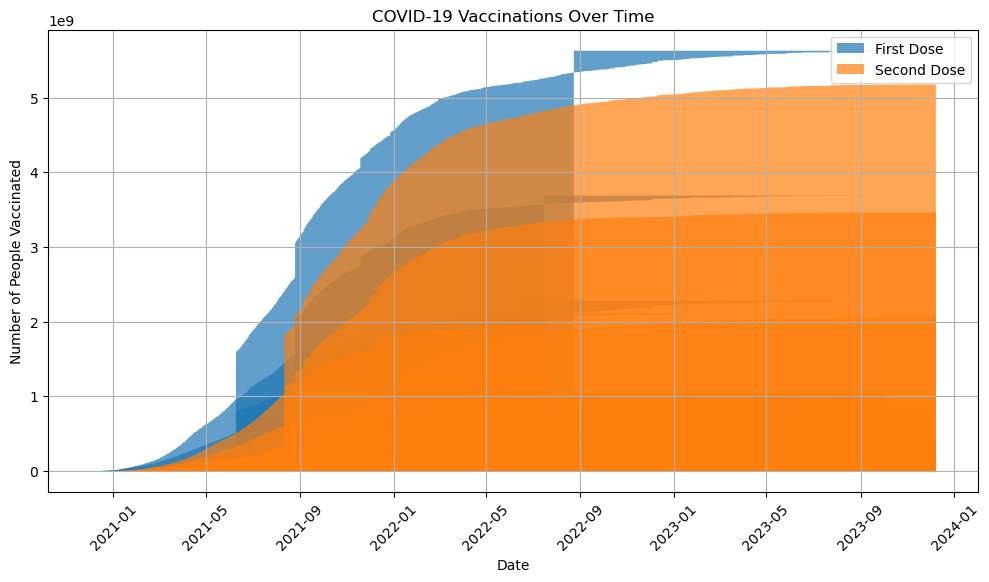

In [53]:


plt.figure(figsize=(12, 6))

# Stacking the data
plt.fill_between(df['date'], df['people_vaccinated'], label='First Dose', step='mid', alpha=0.7)
plt.fill_between(df['date'], df['people_fully_vaccinated'], label='Second Dose', step='mid', alpha=0.7)

plt.title('COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Number of People Vaccinated')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Task 5: Implementation and Evaluation of Machine learning algorithm (any 1)


In [69]:

# Load the CSV file into a pandas DataFrame
data =pd.read_csv(r"C:\Users\shrog ahmad\Desktop\dv_1\Covid Data.csv")


In [70]:
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [71]:

# Select the features and target variable
features = data[['SEX', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']]
target = data['ICU']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = rf_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8208378036859547


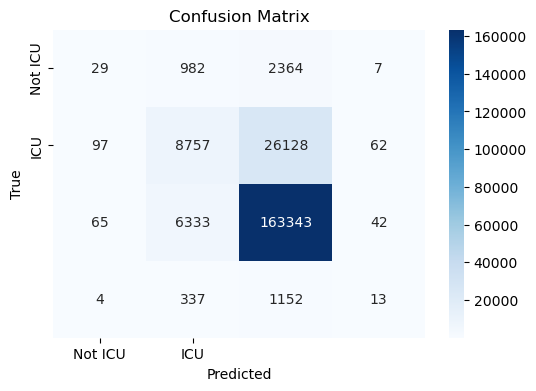

In [73]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not ICU', 'ICU'], yticklabels=['Not ICU', 'ICU'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()